In [3]:
import zipfile

# Extract archive.zip into a folder called world_happiness
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("world_happiness")


In [5]:
import os

# List all files inside the extracted folder
os.listdir("world_happiness")


['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']

In [7]:
import pandas as pd

df = pd.read_csv("world_happiness/2019.csv")
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
# 📌 Step 1: Data Loading & Inspection
years = ['2015', '2016', '2017', '2018', '2019']
folder = 'world_happiness'
df_list = []

for year in years:
    file_path = os.path.join(folder, f"{year}.csv")
    temp_df = pd.read_csv(file_path)
    temp_df['Year'] = int(year)
    df_list.append(temp_df)

# Combine all years
df_all = pd.concat(df_list, ignore_index=True)

# Inspect 2019 dataset (used for focused analysis)
df_2019 = pd.read_csv(os.path.join(folder, '2019.csv'))
df_2019.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
                   'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption']

print("\nFirst 5 rows of 2019 data:")
print(df_2019.head())

print("\nDataset info:")
print(df_2019.info())

print("\nMissing values:")
print(df_2019.isna().sum())



First 5 rows of 2019 data:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                   

In [21]:
#📌 Step 2: Data Cleaning
# No missing values in 2019. No further cleaning needed.
# 📌 Step 3: Data Analysis Operations
print("\nBasic statistics:")
print("Mean happiness score:", np.mean(df_2019['Score']))
print("Median GDP:", np.median(df_2019['GDP per capita']))
print("Standard deviation of life expectancy:", np.std(df_2019['Healthy life expectancy']))

# Group by top 10 countries
top10 = df_2019.nlargest(10, 'Score')
bottom10 = df_2019.nsmallest(10, 'Score')




Basic statistics:
Mean happiness score: 5.407096153846155
Median GDP: 0.96
Standard deviation of life expectancy: 0.24134671229546867


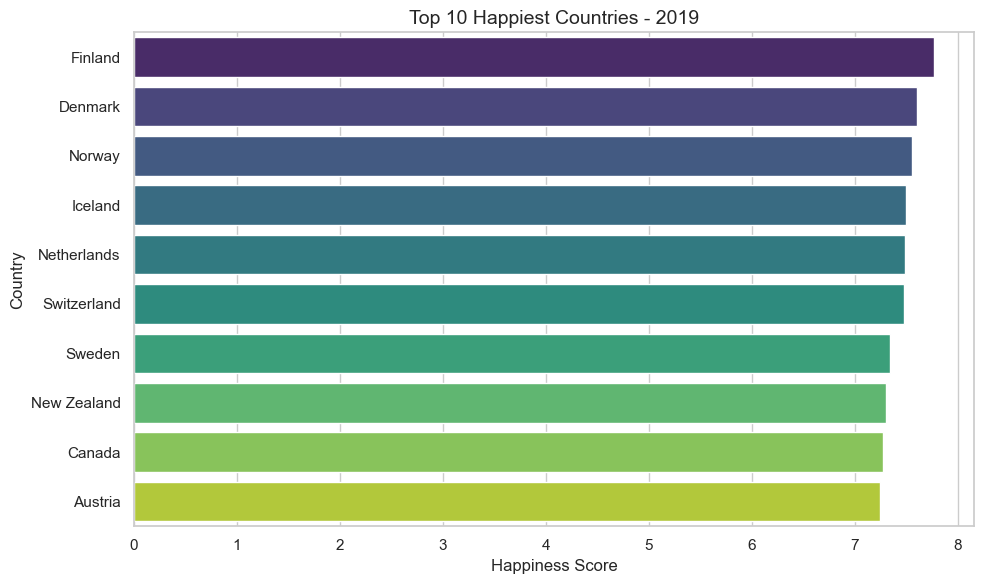

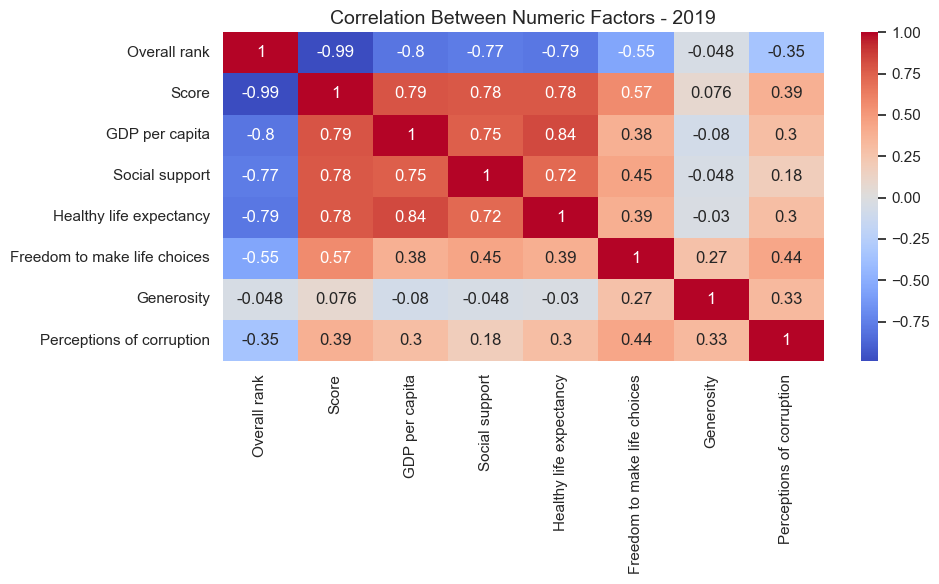

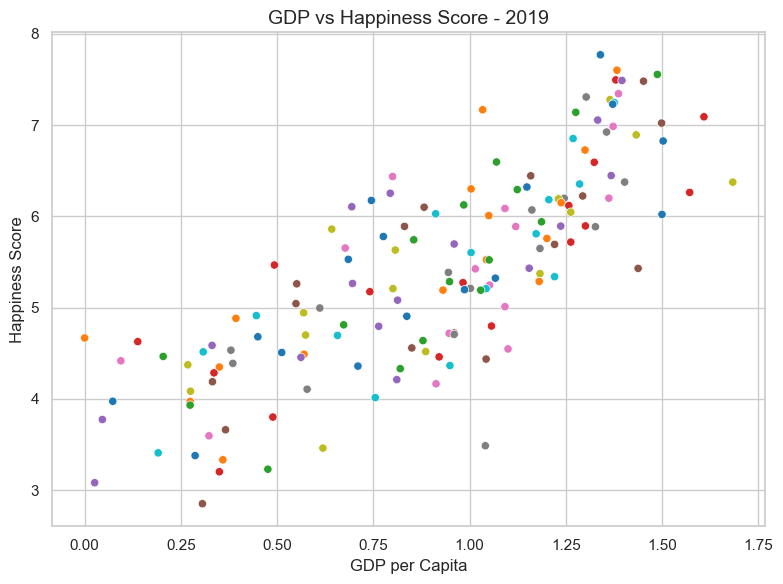

In [27]:
# 📌 Step 4: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure seaborn has a clean style
sns.set(style="whitegrid")

# 📊 1. Top 10 happiest countries barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    y='Country or region',
    x='Score',
    data=top10,
    hue='Country or region',   # added to avoid palette warning
    palette='viridis',
    legend=False               # hide duplicate legends
)
plt.title("Top 10 Happiest Countries - 2019", fontsize=14)
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 📈 2. Correlation heatmap (only numeric columns)
plt.figure(figsize=(10, 6))
numeric_cols = df_2019.select_dtypes(include='number')  # filters out 'Country or region'
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Factors - 2019", fontsize=14)
plt.tight_layout()
plt.show()

# 📉 3. GDP vs Happiness Score Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='GDP per capita',
    y='Score',
    data=df_2019,
    hue='Country or region',
    legend=False,
    palette='tab10'
)
plt.title("GDP vs Happiness Score - 2019", fontsize=14)
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()




In [29]:
# 📌 Step 5: Pivot Table Example
pivot = pd.pivot_table(df_2019, index='Country or region', values='Score', aggfunc='mean')
print("\nPivot Table - Average Happiness Score by Country:")
print(pivot.head())



Pivot Table - Average Happiness Score by Country:
                   Score
Country or region       
Afghanistan        3.203
Albania            4.719
Algeria            5.211
Argentina          6.086
Armenia            4.559
